<a href="https://colab.research.google.com/github/Simson08/ANUDIP-PYTHON-PROJECT/blob/main/LoanApprovalPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


data = pd.read_csv("/content/loan_train.csv")

In [ ]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


DATA PROCESSING & VISUALIZATION

In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [ ]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


Handle Outliers

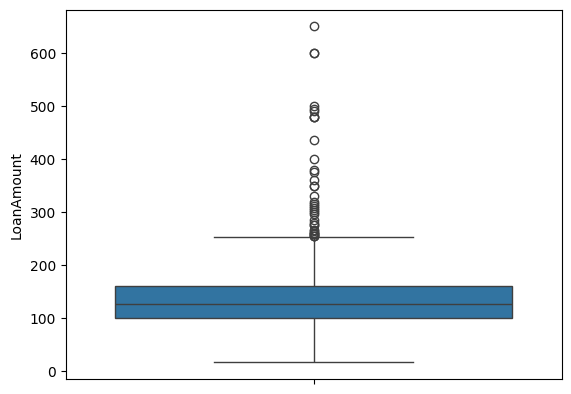

In [ ]:
import seaborn as sns
import numpy as np

# Example: Handling outliers in LoanAmount
sns.boxplot(data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > data['LoanAmount'].quantile(0.95),
                            data['LoanAmount'].quantile(0.95),
                            data['LoanAmount'])

Find out if there is any missing values in the dataset

In [ ]:
for col in data.columns:
    data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

<Figure size 1800x3600 with 0 Axes>

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.4,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((278, 11), (186, 11), (278,), (186,))

Histogram: Loan Amount Distribution with Outliers

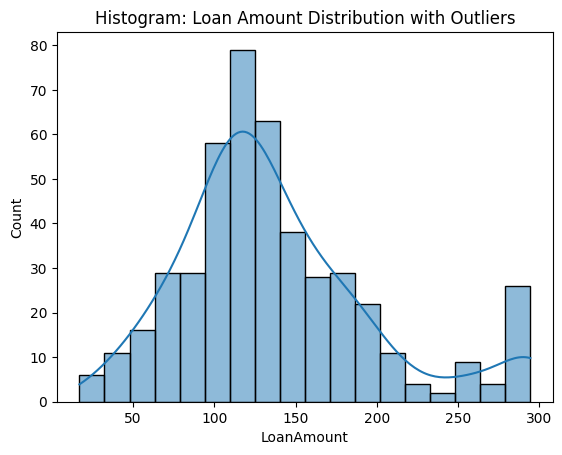

In [ ]:
sns.histplot(data['LoanAmount'], kde=True)
plt.title('Histogram: Loan Amount Distribution with Outliers')
plt.show()

Count plot to visualize Dependents across Gender

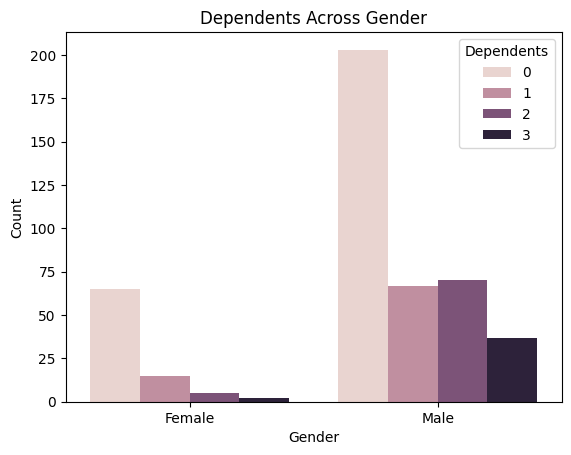

In [ ]:
# Create a count plot to visualize Dependents across Gender
sns.countplot(data=data, x='Gender', hue='Dependents')

# Set custom labels for Gender
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Add title and labels
plt.title('Dependents Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

Model Training and Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
							criterion = 'entropy',
							random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_train)
	print("Accuracy score of ",
		clf.__class__.__name__,
		"=",100*metrics.accuracy_score(Y_train,
										Y_pred))

Accuracy score of  RandomForestClassifier = 97.84172661870504
Accuracy score of  KNeighborsClassifier = 80.93525179856115
Accuracy score of  SVC = 74.10071942446042
Accuracy score of  LogisticRegression = 86.6906474820144


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Prediction on the test set:

In [ ]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_test)
	print("Accuracy score of ",
		clf.__class__.__name__,"=",
		100*metrics.accuracy_score(Y_test,
									Y_pred))

Accuracy score of  RandomForestClassifier = 75.26881720430107
Accuracy score of  KNeighborsClassifier = 61.82795698924731
Accuracy score of  SVC = 67.74193548387096
Accuracy score of  LogisticRegression = 80.10752688172043


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Grouped Bar Plot: Loan Status by Marital Status and Dependents

Text(0.5, 1.0, 'Loan Status by Marital Status and Dependents')

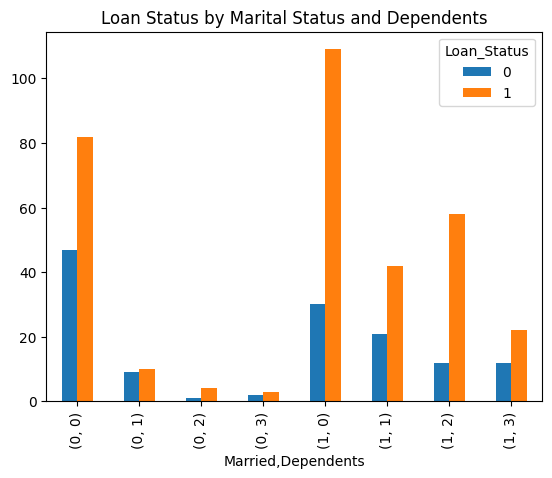

In [ ]:
pd.crosstab([data['Married'], data['Dependents']], data['Loan_Status']).plot(kind='bar') # Replace 'df' with 'data' which is the name of the original DataFrame
plt.title('Loan Status by Marital Status and Dependents')

Box Plot: Loan Amount Distribution for Loan Status

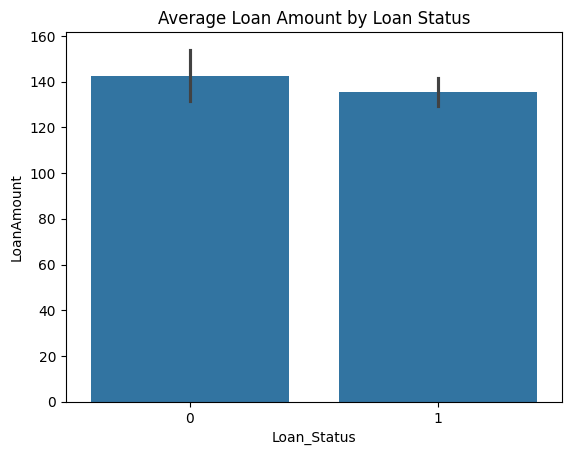

In [ ]:
sns.barplot(data=data, x='Loan_Status', y='LoanAmount')
plt.title('Average Loan Amount by Loan Status')
plt.show()

Scatter Plot: Applicant Income vs. Loan Amount

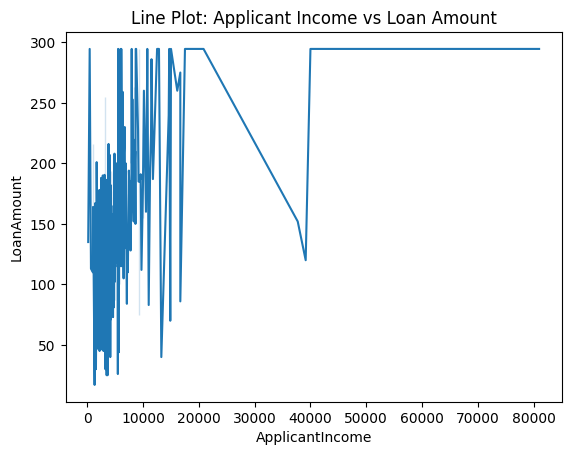

In [ ]:
sns.lineplot(data=data, x='ApplicantIncome', y='LoanAmount')
plt.title('Line Plot: Applicant Income vs Loan Amount')
plt.show()

Count Plot: Loan Status Across Gender

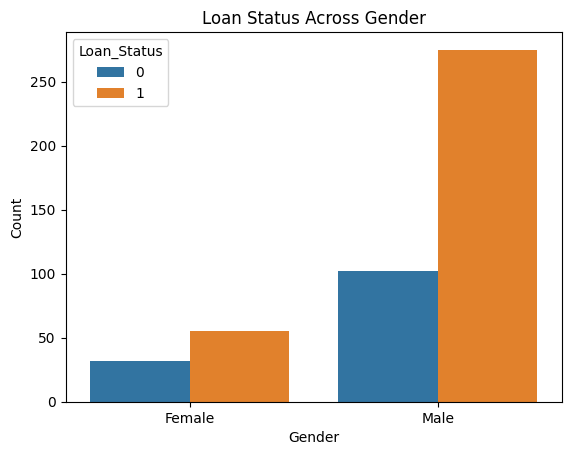

In [ ]:
# Create a bar plot to show Loan Status across Gender
sns.countplot(data=data, x='Gender', hue='Loan_Status')

# Add labels and title
plt.title('Loan Status Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Set custom labels for gender
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.show()

Pie Chart: Proportion of Loans by Property Area

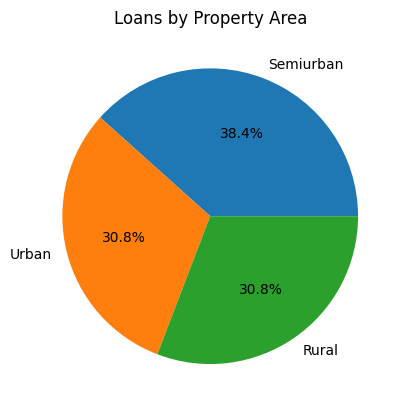

In [ ]:
data['Property_Area'].value_counts().plot(
    kind='pie',
    labels=['Semiurban', 'Urban', 'Rural'],  # Replace with your actual area order
    autopct='%1.1f%%',
    title='Loans by Property Area'
)
plt.ylabel('')  # To remove the default y-label
plt.show()

Histogram: Distribution of Applicant Income

Text(0.5, 0, 'Applicant Income')

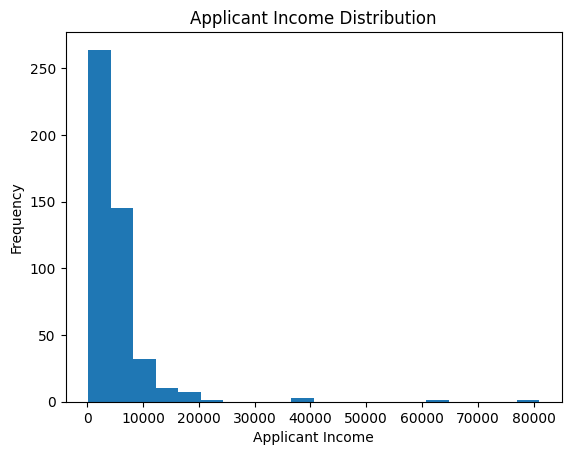

In [ ]:
import matplotlib.pyplot as plt
data['ApplicantIncome'].plot(kind='hist', bins=20, title='Applicant Income Distribution')
plt.xlabel('Applicant Income')

Count Plot: Loan Status by Education

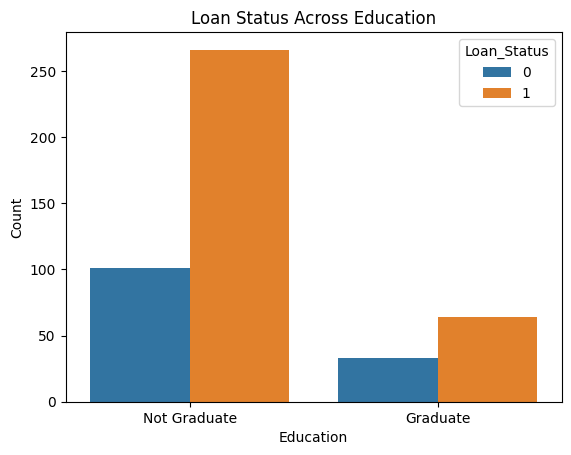

In [ ]:
# Create a count plot to show Loan Status across Education
sns.countplot(data=data, x='Education', hue='Loan_Status')

# Add labels and title
plt.title('Loan Status Across Education')
plt.xlabel('Education')
plt.ylabel('Count')

# Set custom labels for Education
plt.xticks(ticks=[0, 1], labels=['Not Graduate', 'Graduate'])

plt.show()

Pair Plot: Relationships Between Key Variables

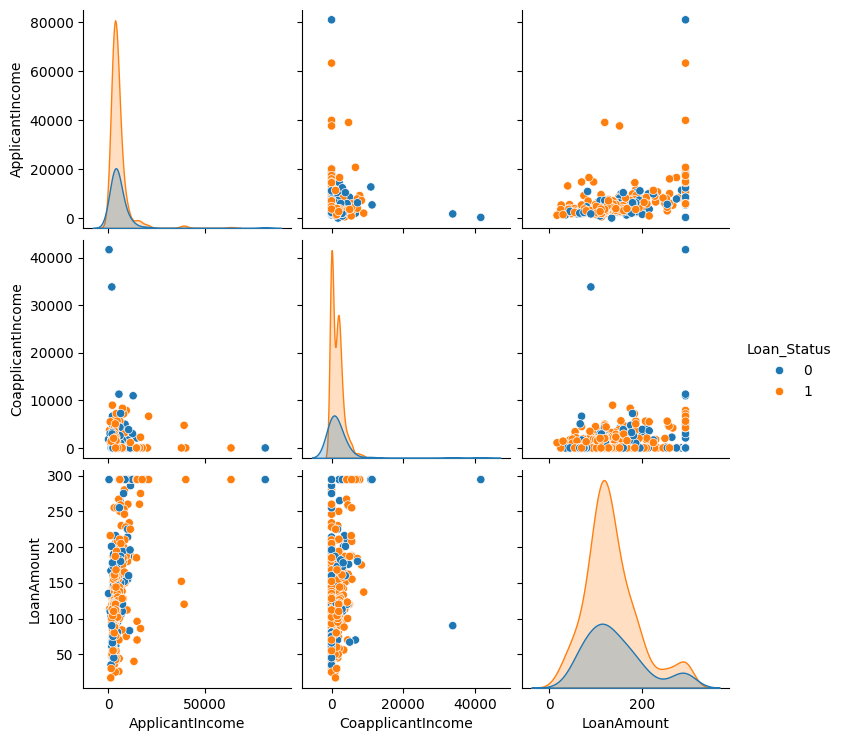

In [ ]:
sns.pairplot(data, vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], hue='Loan_Status')